# Amazon Reviews Sentiment Analysis
Step-by-step NLP project: cleaning, preprocessing, visualization, TF-IDF, ML model, evaluation.

In [47]:
from sklearn.metrics import accuracy_score
print("Imported successfully")


Imported successfully


In [48]:
# Install libraries (run once if needed)
# !pip install pandas matplotlib scikit-learn nltk wordcloud

In [49]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk, re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Create Dummy Dataset

In [50]:
data = {
    'review_text': [
        'Very smooth and fast response works perfectly',
        'Battery life is amazing lasts many days',
        'Okay product nothing special',
        'Stopped working after one week waste of money',
        'Sound quality is clear and bass is strong',
        'Comfortable but connection drops sometimes',
        'Terrible sound very disappointed',
        'Charges quickly and build quality is good',
        'Heating issue while charging',
        'Works fine does the job'
    ],
    'sentiment': ['positive','positive','neutral','negative','positive','neutral','negative','positive','negative','neutral']
}

df = pd.DataFrame(data)
df.head()

,review_text,sentiment
0,Very smooth and fast response works perfectly,positive
1,Battery life is amazing lasts many days,positive
2,Okay product nothing special,neutral
3,Stopped working after one week waste of money,negative
4,Sound quality is clear and bass is strong,positive


## Cleaning & Preprocessing

In [51]:
df['review_text'] = df['review_text'].str.lower()
df['review_text'] = df['review_text'].str.replace(r'[^a-z\s]', '', regex=True)
stop_words = set(stopwords.words('english'))
df['review_text'] = df['review_text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
df.head()

,review_text,sentiment
0,smooth fast response works perfectly,positive
1,battery life amazing lasts many days,positive
2,okay product nothing special,neutral
3,stopped working one week waste money,negative
4,sound quality clear bass strong,positive


## Sentiment Distribution

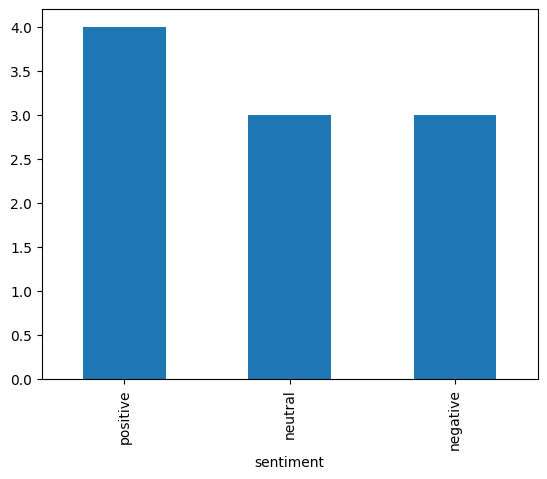

In [57]:
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

## Word Cloud

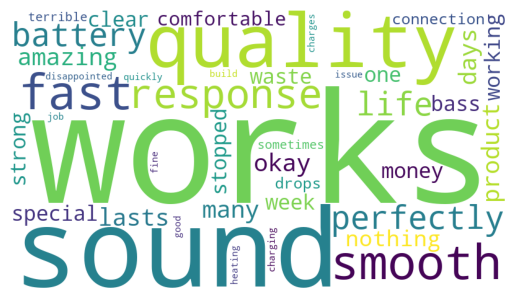

In [53]:
text = ' '.join(df['review_text'])
wc = WordCloud(width=800, height=450, background_color='white').generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

## TF-IDF Feature Engineering

In [54]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review_text'])
y = df['sentiment']

## Train/Test Split & Model

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=50)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## Evaluation

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


Confusion Matrix:
 [[0 1 0]
 [0 0 0]
 [0 1 0]]


In [60]:
%matplotlib inline


In [63]:
import matplotlib.pyplot as plt

# your plotting code here
plt.savefig('chart1.png')  # Save as PNG


<Figure size 640x480 with 0 Axes>